In [2]:
import numpy as np 
import pandas as pd
%matplotlib inline
import sys
import seaborn as sns
%matplotlib inline
import contextily as cx
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
freqs = pd.read_csv("../../results/coe_sweep_frequencies.tsv", sep="\t")

In [4]:
freqs = freqs.drop_duplicates()

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

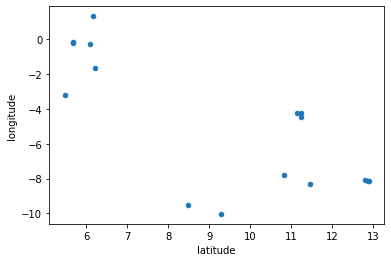

In [5]:
freqs.plot(x='latitude', y='longitude', kind='scatter')

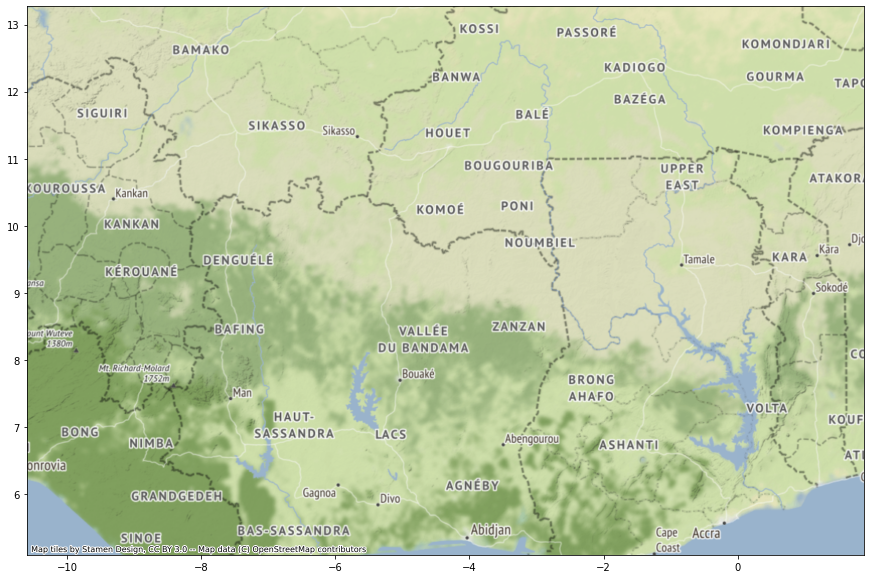

In [6]:
# Sample positions
freqMap = gpd.GeoDataFrame(
    freqs, geometry=gpd.points_from_xy(freqs.longitude, freqs.latitude, crs="EPSG:4326"))

ax = freqMap.plot(figsize=(15, 13), alpha=0)
cx.add_basemap(ax, crs="EPSG:4326")

In [7]:
hap_labels = freqs.iloc[:,4:9].columns.to_list()

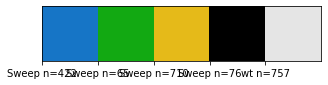

In [18]:
palette = sns.color_palette('nipy_spectral', n_colors=len(hap_labels) - 2, desat=0.8)
# add a colour for other_resistant
palette.append((0, 0, 0))
# add a colour for wt 
palette.append((0.9, 0.9, 0.9))
# check
sns.palplot(palette)
plt.gca().set_xticklabels(hap_labels);

In [19]:
# for legend
f_colors = {l: c for l, c in zip(hap_labels, palette)}
f_colors

{'Sweep n=422': (0.08667000000000002, 0.4621209803921563, 0.78003),
 'Sweep n=65': (0.07385313725490195, 0.6646782352941176, 0.07385313725490195),
 'Sweep n=710': (0.9, 0.7305882352941176, 0.09999999999999998),
 'Sweep n=76': (0, 0, 0),
 'wt n=757': (0.9, 0.9, 0.9)}

In [23]:
import cartopy

In [198]:
freqMap = freqMap.query("n > 5")

In [199]:
['Bana Village',
 'Pala',
 'Souroukoudinga',
 'Aboisso',
 'Koforidua',
 'Madina_North',
 'Madina_West',
 'Obuasi',
 'Koraboh',
 'Koundara',
 'Kababougou',
 'Ouassorola',
 'Takan',
 'Tieneguebougou',
 'Toumani Oulena',
 'Baguida']


freqMap['offset_lon'] = [-0.5, -0.5, 1.5, 0, 0.5, 1,    -0.5, 0, -1, -0.5, -1.5, 0.5,  0,   0,  1]
freqMap['offset_lat'] = [0.5,  -0.5, 0,   0, 1,   -1.5, -1,   1,  0, -1,    -0.5, 0.5, 0, 0, -0.3]
freqMap['label'] = ["bottom", "top", "bottom", "bottom", "bottom", "top", "bottom", "bottom", "bottom", "top", "bottom"
                    , "bottom", "bottom", "top", "bottom"]

/home/sanj/apps/anaconda3/envs/mapping/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [1]:
freqMap

NameError: name 'freqMap' is not defined

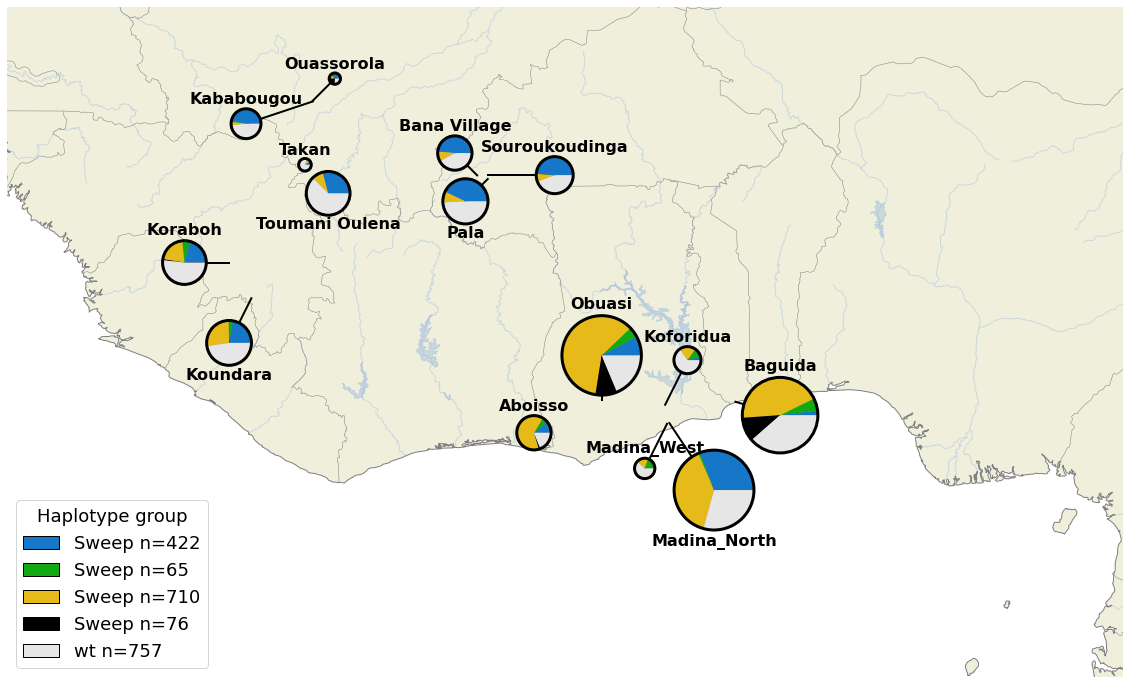

In [216]:
subplot_kw = dict(projection=ccrs.PlateCarree())
# figsize here is the entire figure size in inches, reduced later by bbox_inches
# This dpi setting affects the display size of the figure in the notebook
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=subplot_kw)
ax.add_feature(cfeature.LAND, linewidth=1, zorder=1, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, zorder=2, edgecolor='gray')
ax.add_feature(cfeature.LAKES, alpha=0.4)
ax.add_feature(cfeature.RIVERS, alpha=0.4)


pie_scale_factor=0.002

for _, row in freqMap.iterrows():
    ratios = np.asarray([row[k] for k in hap_labels])
    ratios = np.append(ratios, 1 - np.sum(ratios))

    # wedgeprops is used here just to pass the zorder command
    centre = (row.geometry.x + row.offset_lon, row.geometry.y + row.offset_lat)
    radius=np.sqrt(row.n * pie_scale_factor)

    ax.add_patch(plt.Circle(xy=centre, radius=radius, facecolor='none', edgecolor='k', zorder=8, lw=3))
    ax.pie(ratios, wedgeprops=dict(zorder=7, linewidth=0), colors=palette, center=centre, radius=radius, shadow=True)

    lbl = row['location']
    if row.label == 'bottom':
        ax.text(centre[0], centre[1] + (radius + (0.1 * radius)), lbl, ha='center', va='bottom', fontsize=16, fontweight='bold', bbox=dict(edgecolor='w', facecolor='w', pad=1, alpha=0, ), zorder=6)
    if row.label == 'top':
        ax.text(centre[0], centre[1] - (radius + (0.1 * radius)), lbl, ha='center', va='top', fontsize=16, fontweight='bold', bbox=dict(edgecolor='w', facecolor='w', pad=1, alpha=0, ), zorder=6)

    if row.offset_lat != 0 or row.offset_lon != 0:
        ax.plot([row.geometry.x, row.geometry.x + row.offset_lon],[row.geometry.y, row.geometry.y + row.offset_lat], 'k-', lw=2, zorder=5)
    
        
#cover tiny island
#plt.plot([-15, -5],[-5, -30], 'w', lw=20, zorder=2)
ax.set_extent([-15, 10, 0, 15], crs=ccrs.PlateCarree())

handles = [matplotlib.patches.Patch(facecolor=f_colors[k], edgecolor='k', label=k) for k in hap_labels]
leg = ax.legend(handles=handles, bbox_to_anchor=(0, 0), loc='lower left', ncol=1, title="Haplotype group", title_fontsize=18, prop={'size': 18}, frameon=True, fancybox=True)    
